In [1]:
import h5py
import numpy as np
import time

## Nacteni dat

In [26]:
#file = h5py.File("classification/Keras/results/test_results-no_aug_20epoch_structured_data.hdf5", 'r')
# S-liver
#file = h5py.File("classification/Keras/results/test_results-no_aug_20epoch_structured_data-liver_only.hdf5", 'r')
# L-liver
file = h5py.File("classification/Keras/results/test_results-aug_5epoch_structured_data-liver_only.hdf5", 'r')

test_data = file["test_data"]
test_labels = file["test_labels"][:10]
test_predictions = file["test_predictions"][:10]

for key in file.keys():
    print(key)

test_data
test_labels
test_predictions


In [27]:
# Spravny vypocet -> OK

def accuracy_per_pixel(test_labels, test_predictions):
    print(test_labels.shape, test_predictions.shape)
    N = np.count_nonzero(test_labels[:, :, :, 1] == 1)
    P1 = np.sum(test_predictions[:, :, :, 1][(test_labels[:, :, :, 1] == 1)])
    print("[INFO] Pixel volume lezi v obrazech: ", N)
    print("[INFO] Celkem ppsti v techto regionech: ", P1)
    print("[INFO] Accuracy per pixel:", P1/N)
    s = test_labels.shape
    print("[INFO] Zastoupeni lezi v obraze: ", float(N) / (s[0]*s[1]*s[2]*s[3]))
    return P1/N

t = time.time()
P = accuracy_per_pixel(test_labels, test_predictions)
print(time.time() - t) # trva to 84 sekund pro 3402 obrazku

(10, 240, 232, 3) (10, 240, 232, 3)
[INFO] Pixel volume lezi v obrazech:  19024
[INFO] Celkem ppsti v techto regionech:  4813.42834329
[INFO] Accuracy per pixel: 0.253018731249
[INFO] Zastoupeni lezi v obraze:  0.01138888888888889
0.006002902984619141


In [28]:
s = test_labels.shape
P1 = 0
for k in range(s[0]):
    print(k,)
    for i in range(s[1]):
        for j in range(s[2]):
            if test_labels[k, i, j, 1] == 1:
                P1 += test_predictions[k, i, j, 1]
print(P1)

0
1
2
3
4
5
6
7
8
9
4813.42834329


In [41]:
sigma = 1
mu = 0
Na = sigma * np.random.randn(2,2) + mu
print(Na)


[[-0.42597976  0.95957363]
 [-0.25603437 -1.0299927 ]]


In [42]:
Na = np.random.normal(loc=0.0, scale=1.0, size=(2,2)) # scale je sigma, ne signa na nruhou

[[-0.26122596  0.2892661 ]
 [-0.63593314  1.54127516]]


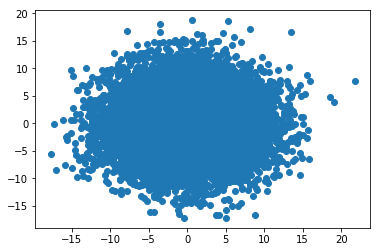

In [52]:
a = np.random.normal(loc=0.0, scale=5.0, size=(2,11000))
import matplotlib.pyplot as plt
plt.scatter(a[0], a[1])
plt.show()


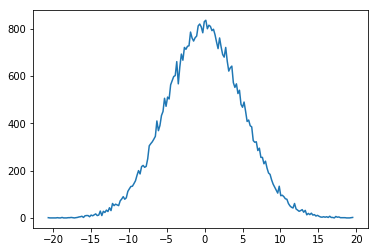

In [71]:
h = np.histogram(np.random.normal(loc=0.0, scale=5.0, size=50000), bins=200)
plt.plot(h[1][:200], h[0])
plt.show()

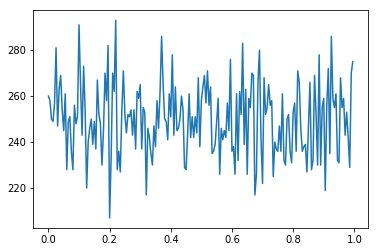

In [75]:
h = np.histogram(np.random.uniform(size=50000), bins=200)
plt.plot(h[1][:200], h[0])
plt.show()

In [79]:
a = np.ones((2,2))
print(np.minimum(a, 0))

[[ 0.  0.]
 [ 0.  0.]]


In [9]:
a = np.random.uniform(size=(20000,2))
print(np.min(a), np.max(a))

1.90861531535e-05 0.999993543279
